# IBCSO v2 surface and bed elevation
**Description:** International Bathymetric Chart of the Southern Ocean Version 2 gridded data. 

**Dataset:** 

Dorschel, Boris, Laura Hehemann, Sacha Viquerat, Fynn Warnke, Simon Dreutter, Yvonne Schulze Tenberge, Daniela Accettella, et al. “The International Bathymetric Chart of the Southern Ocean Version 2 (IBCSO V2).” PANGAEA, 2022. https://doi.org/10.1594/PANGAEA.937574.


**Associated paper:** 

Dorschel, Boris, Laura Hehemann, Sacha Viquerat, Fynn Warnke, Simon Dreutter, Yvonne Schulze Tenberge, Daniela Accettella, et al. “The International Bathymetric Chart of the Southern Ocean Version 2.” Scientific Data 9, no. 1 (December 2022): 275. https://doi.org/10.1038/s41597-022-01366-7.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, utils

In [ ]:
layer_names = ["surface", "bed"]

grids = []
for name in layer_names:
    data = fetch.ibcso(
        layer=name,
        spacing=5e3,
        # available options
        # region,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

100%|████████████████████████████████████████| 738M/738M [00:00<00:00, 646GB/s]
/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pooch/core.py:251: UserWarning: preprocessing for this grid (reprojecting to EPSG:3031) for the first time can take several minutes!
  return processor(str(full_path), action, None)
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


Info for surface
grid spacing: 5000.0 m
grid region: (-3500000.0, 3500000.0, -3500000.0, 3500000.0)
grid zmin: -8378.40429688
grid zmax: 4519.96826172
grid registration: g
##########


100%|████████████████████████████████████████| 738M/738M [00:00<00:00, 643GB/s]
/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pooch/core.py:251: UserWarning: preprocessing for this grid (reprojecting to EPSG:3031) for the first time can take several minutes!
  return processor(str(full_path), action, None)
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


Info for bed
grid spacing: 5000.0 m
grid region: (-3500000.0, 3500000.0, -3500000.0, 3500000.0)
grid zmin: -8378.40429688
grid zmax: 4515.13574219
grid registration: g
##########


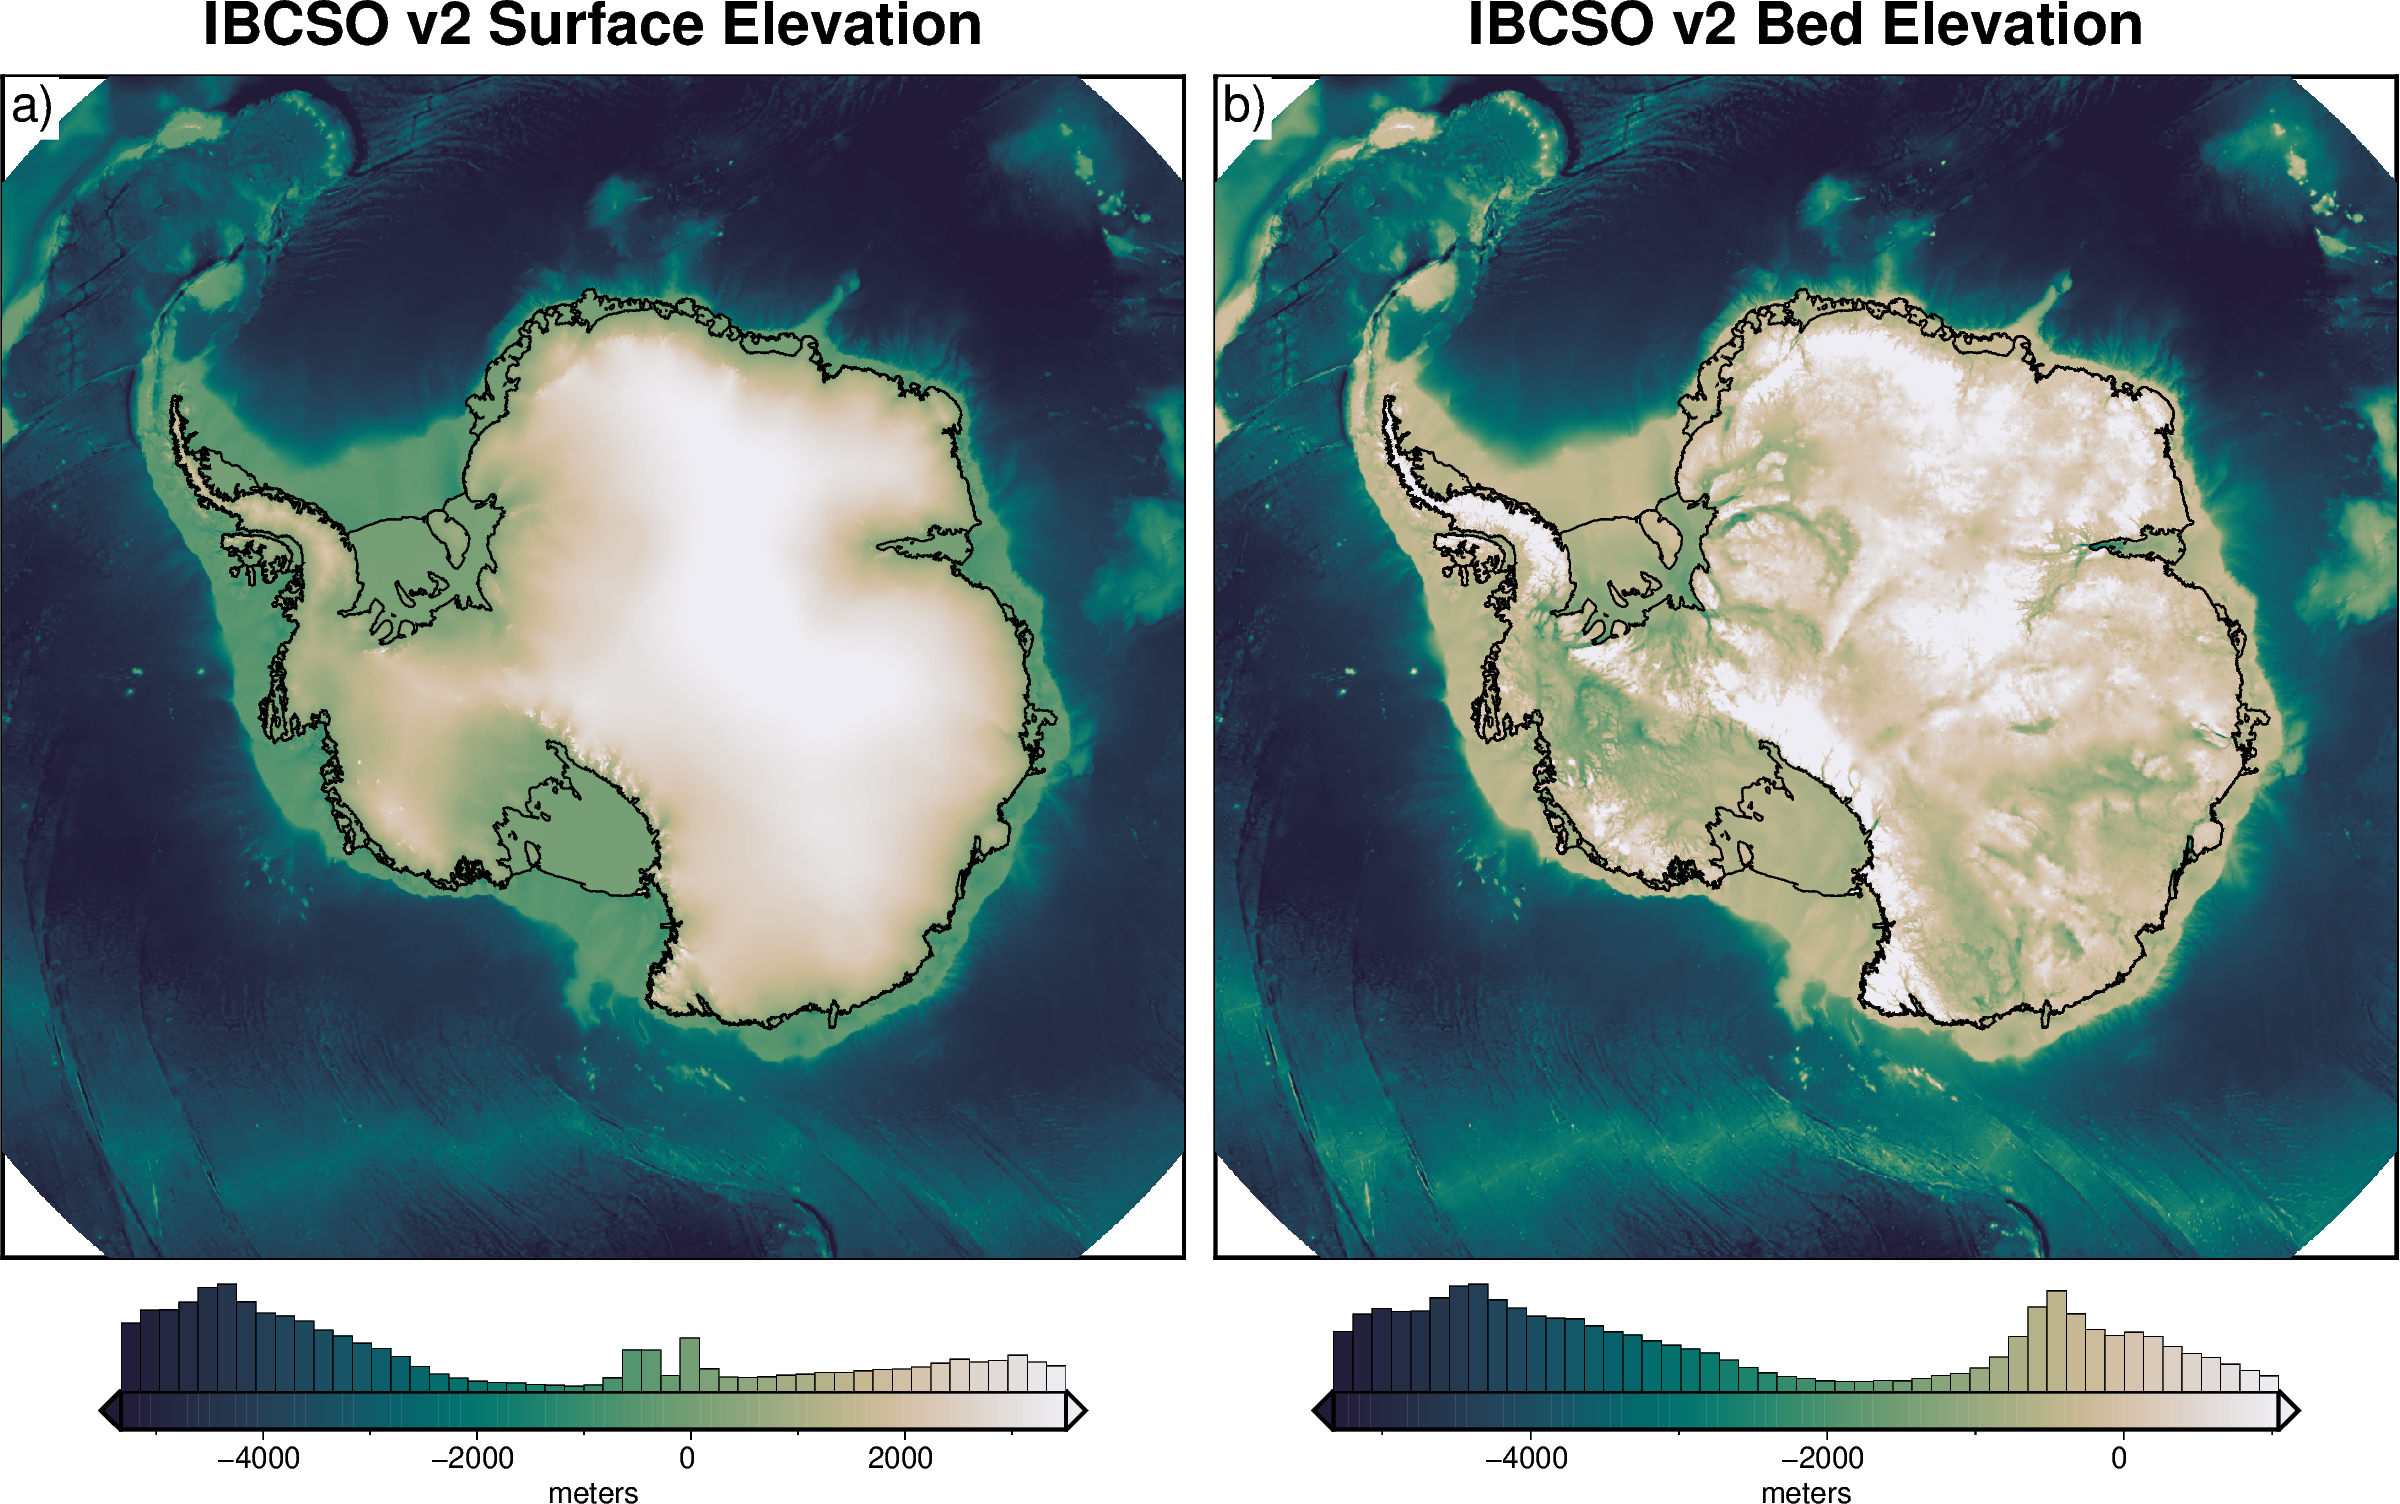

In [5]:
fig = maps.subplots(
    grids,
    titles=[
        "IBCSO v2 Surface Elevation",
        "IBCSO v2 Bed Elevation",
    ],
    coast=True,
    cbar_label="meters",
    hist=True,
    robust=True,
    cmap="rain",
    reverse_cpt=True,
    hemisphere="south",
)
fig.show(dpi=200)